In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, train_surrogate_tree, plot_surrogate_tree,\
                           extract_rules, print_rules, evaluate_generated_data,\
                           evaluate, plot_tree_leafs_2d, plot_diro2c_2d, get_surrogate_tree,\
                           get_feature_importances, plot_feature_importances
from util import RuleClassifier, evaluate_counterfactual_fidelity, print_complexity
from tasks.gaussian_quantiles import make_task

In [3]:
clf_a, clf_b, X, y, feature_names, feature_precisions = make_task()

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Global explanations

In [5]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(1,0)$

In [6]:
focus_class = '(1, 0)'
focus_class_idx = list(comparer.class_names).index(focus_class)

In [10]:
%%time
explainer = WrappedDiro2C(X, comparer, focus_class)
explanation = explainer.generate_global_explanation()
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump((explainer, explanation), f, pickle.HIGHEST_PROTOCOL)

CPU times: user 17min 36s, sys: 8.32 s, total: 17min 45s
Wall time: 18min 57s


In [7]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explainer, explanation = pickle.load(f)

In [8]:
with open(f'ground_truth.{focus_class}.pickle', 'rb') as f:
    ground_truth_instance_indices, ground_truth = pickle.load(f)

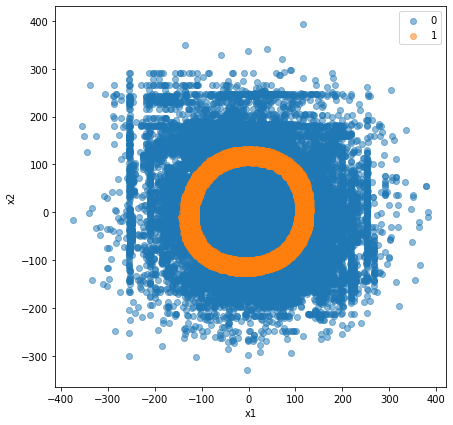

In [9]:
plot_diro2c_2d(explanation, 'x1', 'x2')

### Tree with Depth 2

In [10]:
%%time
train_surrogate_tree(explanation, max_depth=2)

CPU times: user 33 ms, sys: 4.64 ms, total: 37.7 ms
Wall time: 42.1 ms


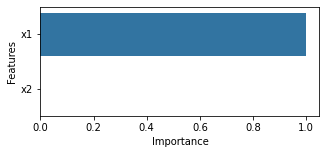

In [11]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

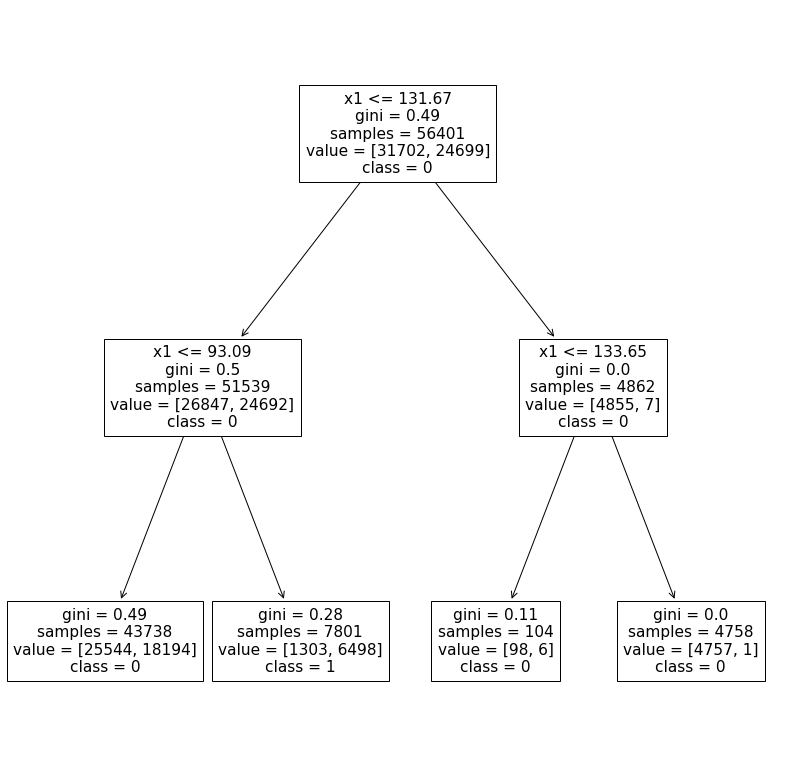

In [12]:
plot_surrogate_tree(explanation, precision=2)

In [18]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 [1303, 6498]


In [19]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    0
151    0
152    1
153    0
155    0
      ..
448    1
449    0
454    1
457    0
465    0
Length: 101, dtype: int64

In [20]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 [1303, 6498]


In [21]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.63      0.96      0.76     31702
           1       0.83      0.26      0.40     24699

    accuracy                           0.65     56401
   macro avg       0.73      0.61      0.58     56401
weighted avg       0.72      0.65      0.60     56401



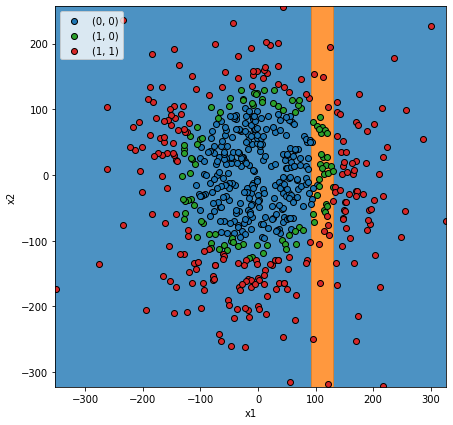

In [18]:
plot_tree_leafs_2d(explanation, comparer, X)

Low recall.

### Tree with Depth 3

In [22]:
%%time
train_surrogate_tree(explanation, max_depth=3)

CPU times: user 50.7 ms, sys: 3.1 ms, total: 53.8 ms
Wall time: 61.9 ms


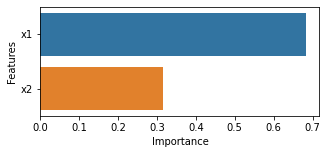

In [23]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

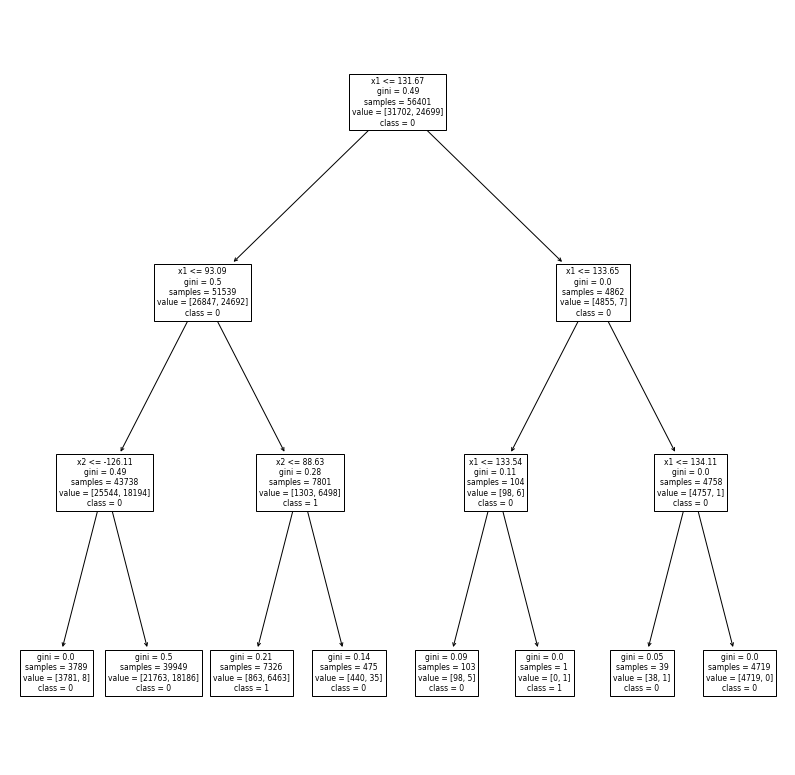

In [24]:
plot_surrogate_tree(explanation, precision=2)

In [25]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 and x2 <= 88.63322448730469 [863, 6463]
2. 133.5440902709961 < x1 <= 133.6478729248047 [0, 1]


In [26]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    0
151    0
152    1
153    0
155    0
      ..
448    1
449    0
454    1
457    0
465    0
Length: 101, dtype: int64

In [27]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 and x2 <= 88.63322448730469 [863, 6463]


In [28]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.63      0.97      0.76     31702
           1       0.88      0.26      0.40     24699

    accuracy                           0.66     56401
   macro avg       0.76      0.62      0.58     56401
weighted avg       0.74      0.66      0.61     56401



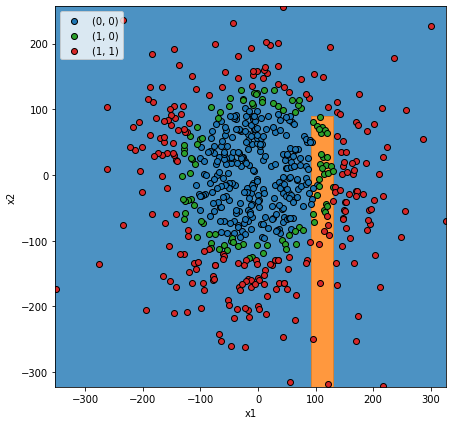

In [29]:
plot_tree_leafs_2d(explanation, comparer, X)

### Tree with Depth 4

In [30]:
%%time
train_surrogate_tree(explanation, max_depth=4)

CPU times: user 62.4 ms, sys: 17.1 ms, total: 79.5 ms
Wall time: 87.7 ms


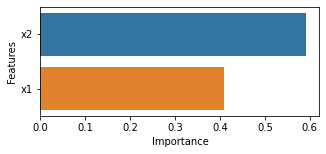

In [31]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

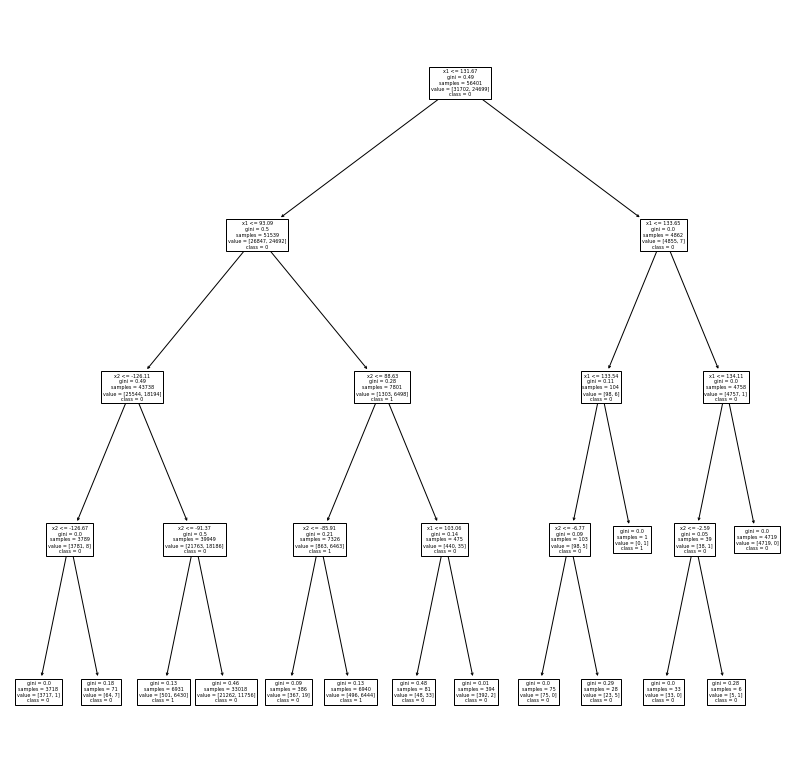

In [32]:
plot_surrogate_tree(explanation, precision=2)

In [33]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 and -85.9105110168457 < x2 <= 88.63322448730469 [496, 6444]
2. x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -91.37428283691406 [501, 6430]
3. 133.5440902709961 < x1 <= 133.6478729248047 [0, 1]


In [34]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    2
151    2
152    1
153    0
155    2
      ..
448    1
449    0
454    1
457    2
465    0
Length: 101, dtype: int64

In [35]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. 93.0859603881836 < x1 <= 131.66983795166016 and -85.9105110168457 < x2 <= 88.63322448730469 [496, 6444]
2. x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -91.37428283691406 [501, 6430]


In [36]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     31702
           1       0.93      0.52      0.67     24699

    accuracy                           0.77     56401
   macro avg       0.83      0.74      0.75     56401
weighted avg       0.81      0.77      0.76     56401



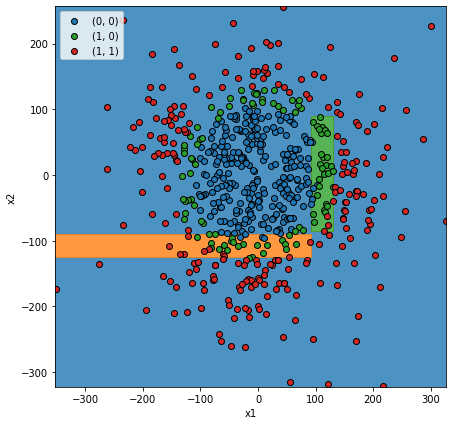

In [37]:
plot_tree_leafs_2d(explanation, comparer, X)

### Tree with Depth 5

In [38]:
%%time
train_surrogate_tree(explanation, max_depth=5)

CPU times: user 65 ms, sys: 13 ms, total: 78 ms
Wall time: 80.9 ms


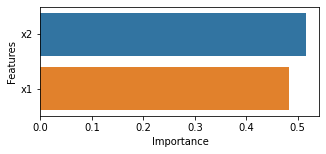

In [39]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

In [40]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. x1 <= -102.8320426940918 and x2 > -91.37428283691406 [3127, 4822]
2. -104.15982818603516 < x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -91.37428283691406 [365, 6428]
3. 101.21749114990234 < x1 <= 131.66983795166016 and -85.9105110168457 < x2 <= 88.63322448730469 [239, 5533]
4. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= 88.63322448730469 [257, 911]
5. 93.0859603881836 < x1 <= 103.06002426147461 and 88.63322448730469 < x2 <= 101.803466796875 [2, 33]
6. 131.66983795166016 < x1 <= 133.5440902709961 and -6.768008589744568 < x2 <= 24.769357681274414 [0, 5]
7. 133.6478729248047 < x1 <= 134.10590362548828 and -2.587000846862793 < x2 <= 28.199177265167236 [0, 1]
8. 133.5440902709961 < x1 <= 133.6478729248047 [0, 1]


In [41]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    2
151    2
152    3
153    0
155    2
      ..
448    3
449    0
454    3
457    2
465    1
Length: 101, dtype: int64

In [42]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. x1 <= -102.8320426940918 and x2 > -91.37428283691406 [3127, 4822]
2. -104.15982818603516 < x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -91.37428283691406 [365, 6428]
3. 101.21749114990234 < x1 <= 131.66983795166016 and -85.9105110168457 < x2 <= 88.63322448730469 [239, 5533]
4. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= 88.63322448730469 [257, 911]


In [43]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     31702
           1       0.82      0.72      0.76     24699

    accuracy                           0.81     56401
   macro avg       0.81      0.80      0.80     56401
weighted avg       0.81      0.81      0.80     56401



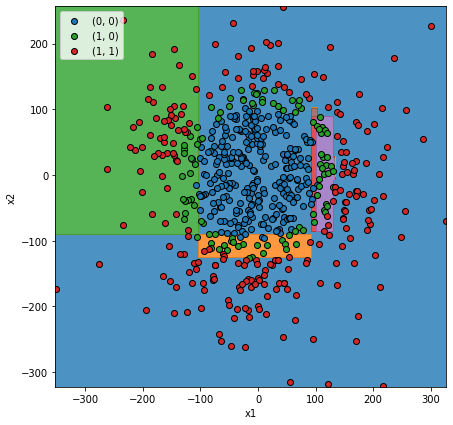

In [44]:
plot_tree_leafs_2d(explanation, comparer, X)

### Tree with Depth 6

In [45]:
%%time
train_surrogate_tree(explanation, max_depth=6)

CPU times: user 73.4 ms, sys: 12.5 ms, total: 85.9 ms
Wall time: 91.6 ms


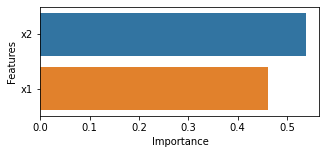

In [46]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

In [47]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. -102.8320426940918 < x1 <= 93.0859603881836 and x2 > 72.6111068725586 [3968, 5392]
2. -104.15982818603516 < x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -97.18037033081055 [194, 5864]
3. -140.7723159790039 < x1 <= -102.8320426940918 and x2 > -91.37428283691406 [1161, 4814]
4. 101.21749114990234 < x1 <= 131.66983795166016 and -75.58699417114258 < x2 <= 88.63322448730469 [203, 5511]
5. -104.15982818603516 < x1 <= 93.0859603881836 and -97.18037033081055 < x2 <= -91.37428283691406 [171, 564]
6. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= 43.48872756958008 [253, 371]
7. 93.0859603881836 < x1 <= 101.21749114990234 and 43.48872756958008 < x2 <= 88.63322448730469 [4, 540]
8. 93.0859603881836 < x1 <= 103.06002426147461 and 88.63322448730469 < x2 <= 97.42276763916016 [0, 31]
9. 93.0859603881836 < x1 <= 97.54968643188477 and -91.70584106445312 < x2 <= -85.9105110168457 [2, 19]
10. -22.64073085784912 < x1 <= 3.8638877868652344 and -126.67192840576172 < x2

In [48]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    2
151    2
152    4
153    1
155    2
      ..
448    4
449    1
454    4
457    2
465    3
Length: 101, dtype: int64

In [49]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. -102.8320426940918 < x1 <= 93.0859603881836 and x2 > 72.6111068725586 [3968, 5392]
2. -104.15982818603516 < x1 <= 93.0859603881836 and -126.10700607299805 < x2 <= -97.18037033081055 [194, 5864]
3. -140.7723159790039 < x1 <= -102.8320426940918 and x2 > -91.37428283691406 [1161, 4814]
4. 101.21749114990234 < x1 <= 131.66983795166016 and -75.58699417114258 < x2 <= 88.63322448730469 [203, 5511]
5. -104.15982818603516 < x1 <= 93.0859603881836 and -97.18037033081055 < x2 <= -91.37428283691406 [171, 564]
6. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= 43.48872756958008 [253, 371]
7. 93.0859603881836 < x1 <= 101.21749114990234 and 43.48872756958008 < x2 <= 88.63322448730469 [4, 540]
8. -22.64073085784912 < x1 <= 3.8638877868652344 and -126.67192840576172 < x2 <= -126.10700607299805 [0, 7]


In [50]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     31702
           1       0.80      0.94      0.86     24699

    accuracy                           0.87     56401
   macro avg       0.87      0.87      0.87     56401
weighted avg       0.88      0.87      0.87     56401



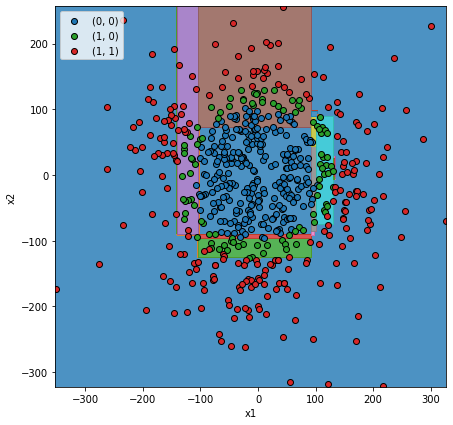

In [51]:
plot_tree_leafs_2d(explanation, comparer, X)

### Tree with Depth 7

In [52]:
%%time
train_surrogate_tree(explanation, max_depth=7)

CPU times: user 85.8 ms, sys: 14.5 ms, total: 100 ms
Wall time: 110 ms


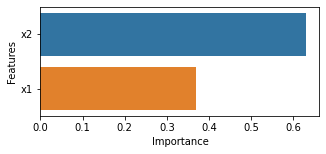

In [53]:
feature_importances, feature_order = get_feature_importances(explanation)
plot_feature_importances(explanation, feature_importances, feature_order)

In [54]:
y = (mclass_diff == focus_class_idx).astype(int)
constraints, rules, class_occurences, instance_indices_per_rule = extract_rules(explanation, X, y)
print_rules(rules, class_occurences)

1. -102.8320426940918 < x1 <= 93.0859603881836 and 72.6111068725586 < x2 <= 130.3593978881836 [1259, 5371]
2. -104.15982818603516 < x1 <= 85.43607330322266 and -126.10700607299805 < x2 <= -97.18037033081055 [165, 5863]
3. 101.21749114990234 < x1 <= 131.66983795166016 and -75.58699417114258 < x2 <= 82.3029899597168 [172, 5465]
4. -140.7723159790039 < x1 <= -102.8320426940918 and -91.37428283691406 < x2 <= 86.26233291625977 [417, 4812]
5. 93.0859603881836 < x1 <= 101.21749114990234 and 53.360389709472656 < x2 <= 88.63322448730469 [0, 486]
6. -104.15982818603516 < x1 <= 38.49611854553223 and -97.18037033081055 < x2 <= -91.37428283691406 [167, 249]
7. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= -38.136953353881836 [18, 345]
8. 38.49611854553223 < x1 <= 93.0859603881836 and -97.18037033081055 < x2 <= -91.37428283691406 [4, 315]
9. 101.21749114990234 < x1 <= 131.66983795166016 and 82.3029899597168 < x2 <= 88.63322448730469 [31, 46]
10. 93.0859603881836 < x1 <= 1

In [55]:
indices = np.where(mclass_diff == focus_class_idx)[0]
pred_rules = pd.Series(RuleClassifier(feature_names, rules).apply(X[indices]), index=indices)
pred_rules

150    2
151    2
152    3
153    1
155    2
      ..
448    3
449    1
454    3
457    2
465    4
Length: 101, dtype: int64

In [56]:
constraints, rules, class_occurences, instance_indices_per_rule = \
    zip(*[el for i, el in enumerate(zip(constraints, rules, class_occurences, instance_indices_per_rule), 1)
           if i in np.unique(pred_rules)])
print_rules(rules, class_occurences)

1. -102.8320426940918 < x1 <= 93.0859603881836 and 72.6111068725586 < x2 <= 130.3593978881836 [1259, 5371]
2. -104.15982818603516 < x1 <= 85.43607330322266 and -126.10700607299805 < x2 <= -97.18037033081055 [165, 5863]
3. 101.21749114990234 < x1 <= 131.66983795166016 and -75.58699417114258 < x2 <= 82.3029899597168 [172, 5465]
4. -140.7723159790039 < x1 <= -102.8320426940918 and -91.37428283691406 < x2 <= 86.26233291625977 [417, 4812]
5. 93.0859603881836 < x1 <= 101.21749114990234 and 53.360389709472656 < x2 <= 88.63322448730469 [0, 486]
6. -104.15982818603516 < x1 <= 38.49611854553223 and -97.18037033081055 < x2 <= -91.37428283691406 [167, 249]
7. 93.0859603881836 < x1 <= 101.21749114990234 and -85.9105110168457 < x2 <= -38.136953353881836 [18, 345]
8. 38.49611854553223 < x1 <= 93.0859603881836 and -97.18037033081055 < x2 <= -91.37428283691406 [4, 315]
9. 101.21749114990234 < x1 <= 131.66983795166016 and 82.3029899597168 < x2 <= 88.63322448730469 [31, 46]
10. -22.64073085784912 < x1 <=

In [57]:
evaluate_generated_data(explanation)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     31702
           1       0.91      0.94      0.92     24699

    accuracy                           0.93     56401
   macro avg       0.93      0.93      0.93     56401
weighted avg       0.93      0.93      0.93     56401



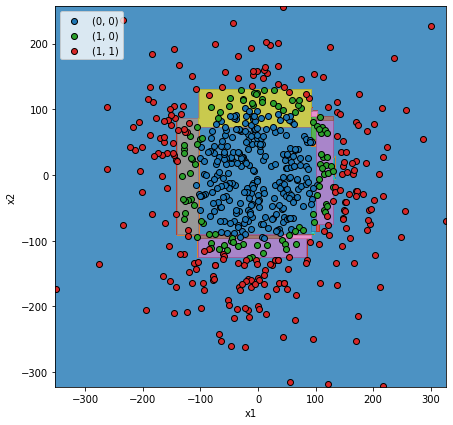

In [58]:
plot_tree_leafs_2d(explanation, comparer, X)

#### Evaluation

##### Global Fidelity

In [59]:
evaluate(explanation, X, mclass_diff == focus_class_idx)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       499
           1       0.64      0.90      0.75       101

    accuracy                           0.90       600
   macro avg       0.81      0.90      0.84       600
weighted avg       0.92      0.90      0.90       600



##### Counterfactual Fidelity Error

In [61]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices, ground_truth, instance_indices_per_rule, constraints)

In [62]:
rmse

x1    33.844130
x2    28.821116
dtype: float64

In [63]:
boundary_miss_rate

x1    0.0
x2    0.0
dtype: float64

In [64]:
boundary_add_rate

x1    0.0
x2    0.0
dtype: float64

##### Complexity

In [65]:
print_complexity(constraints)

Number of rules: 10
Number of constraints: 40 (4.0 per rule)


# Summary

## Global Fidelity

This interpretability method fails completely to make a high level abstraction of the differences. The first explanation, that covers a good portion of the instances classified differently can already be considered a local explanation.

Ruleset | Precision | Recall | F1
 --- | --- | --- | ---
10/global | -\% | -\% | -\%
10/local | 64\% | 90\% | 75\%

## Counterfactual Fidelity Error

Ruleset | RMSE | boundaries missed | unnecessary boundaries
 --- | --- | --- | ---
10/global | - | -\% | -\%
10/local | 31.4 | 0\% | 0\%

## Complexity

Ruleset | # Rules | # Constraints
 --- | --- | ---
10/global | - | -
10/local | 21 | 82

## Generation Time

approx. 19min.